# Analysis Using Data Clustering

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
from matplotlib import rcParams
import numpy as np
from sklearn import preprocessing
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [14]:
cDf = pd.read_csv('/content/drive/MyDrive/SpotifyP/cdata/finalCleaned.csv')
x = cDf[['danceability', 'energy', 'loudness',	'speechiness',	'acousticness',	'instrumentalness',	'liveness',	'valence','tempo'	]]

Understanding the categories of music I listen to :
- I will be using clustering algorithms for this task.

In [15]:
x

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.731,0.580,-7.328,0.0399,0.223000,0.000000,0.1290,0.319,120.001
1,0.782,0.728,-5.930,0.0768,0.427000,0.000000,0.2500,0.876,97.975
2,0.782,0.728,-5.930,0.0768,0.427000,0.000000,0.2500,0.876,97.975
3,0.700,0.747,-6.044,0.0436,0.127000,0.000000,0.0941,0.629,111.941
4,0.693,0.604,-5.279,0.0427,0.066800,0.000000,0.1140,0.651,75.014
...,...,...,...,...,...,...,...,...,...
7755,0.688,0.742,-6.363,0.0496,0.009120,0.000001,0.1860,0.740,110.026
7756,0.737,0.747,-4.818,0.0323,0.269000,0.000000,0.2190,0.447,105.943
7757,0.324,0.863,-3.716,0.1230,0.000109,0.000000,0.3110,0.394,177.985
7758,0.679,0.619,-4.983,0.0528,0.213000,0.000000,0.1050,0.497,124.944


Clustering algos calcualte the distance between datapoints for forming clusters for which data needs to be standardized and shouldn't be ranging all over the place.

In [16]:
x = preprocessing.scale(x)

In order to visualise this data in a 2D space I need to reduce its dimensionality. I can do this by using t-Distributed Stochastic Neighbour Embedding [TSNE] which is used to represent high dimensional data in a low dimensional space.

In [21]:
xDimRed = TSNE(learning_rate=100).fit_transform(x)

<Axes: >

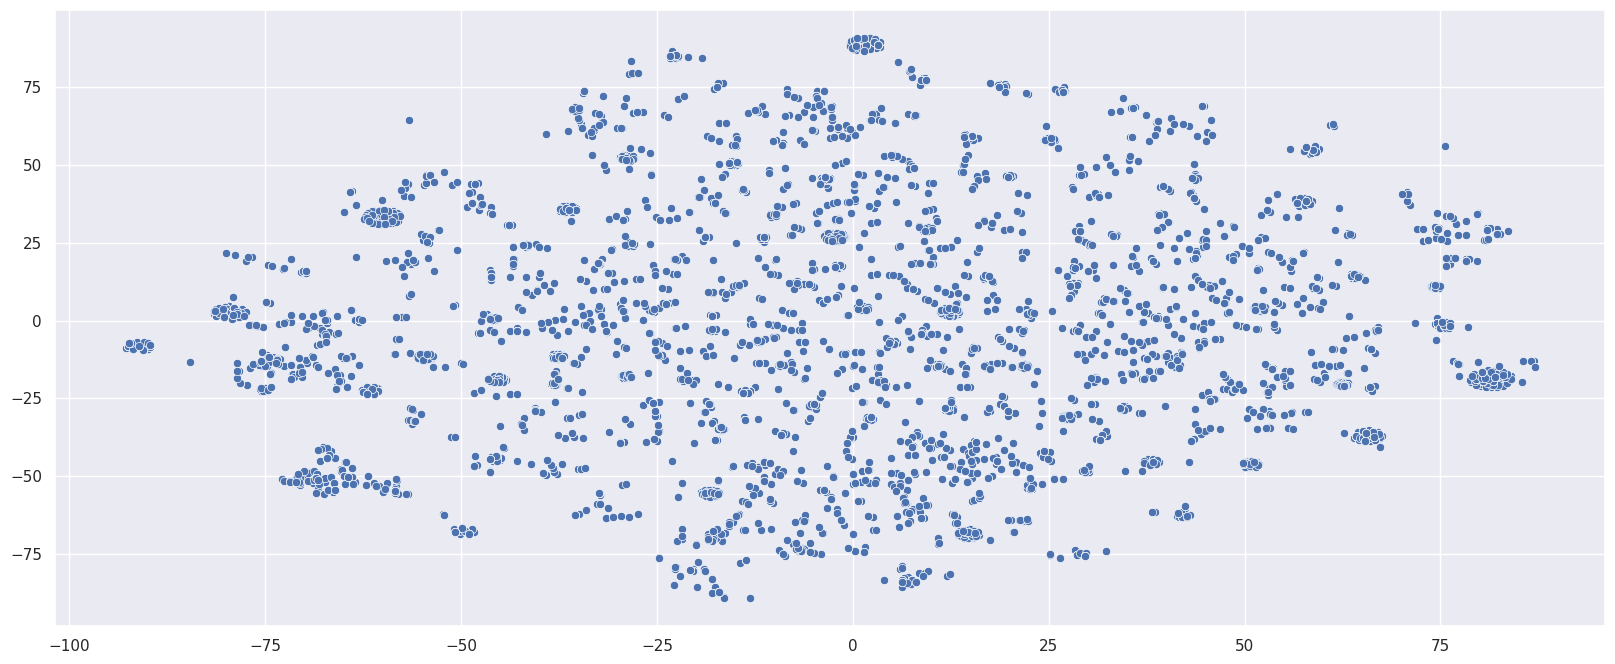

In [27]:
x_cord = xDimRed[:,0]
y_cord = xDimRed[:,1]
rcParams['figure.figsize'] = 20,8
sns.scatterplot(x = x_cord, y = y_cord)

In [28]:
myDf = pd.DataFrame({'d1':x_cord, 'd2':y_cord})

In order to understand the number of iterations to consider I'll be using the elbow method which helps in computing the 'within cluster sum of square' i.e the sum of sqaured distance between datapoints

In [30]:
dist = []

for i in range(1,11):
  km = KMeans(i)
  km.fit(xDimRed)
  dist.append(km.inertia_)

Text(0, 0.5, 'WCSS')

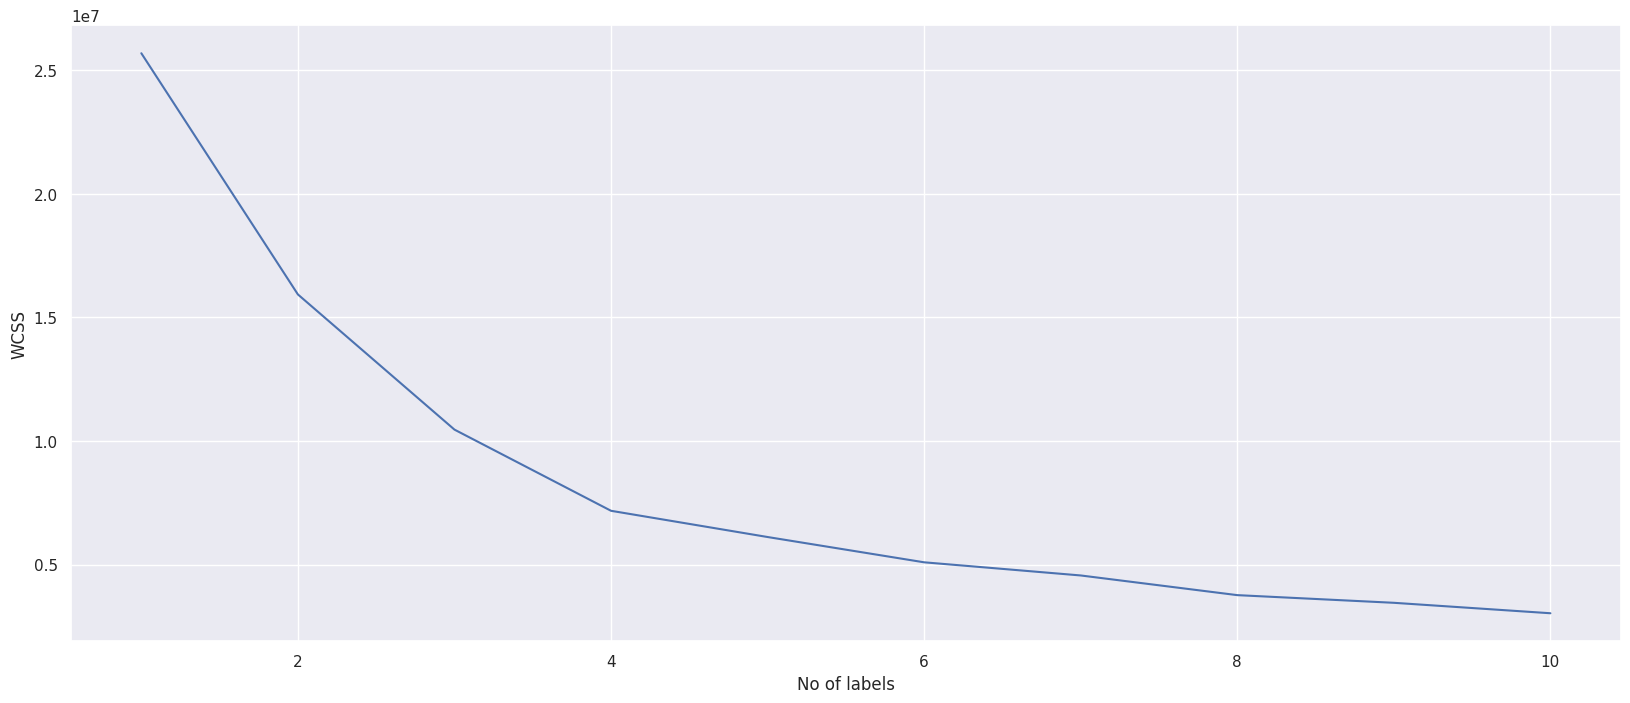

In [32]:
sns.lineplot(x= range(1,11), y = dist)
plt.xlabel('No of labels')
plt.ylabel('WCSS')

From the plot its clear that the optimal value for iterations should be 6

<Axes: xlabel='d1', ylabel='d2'>

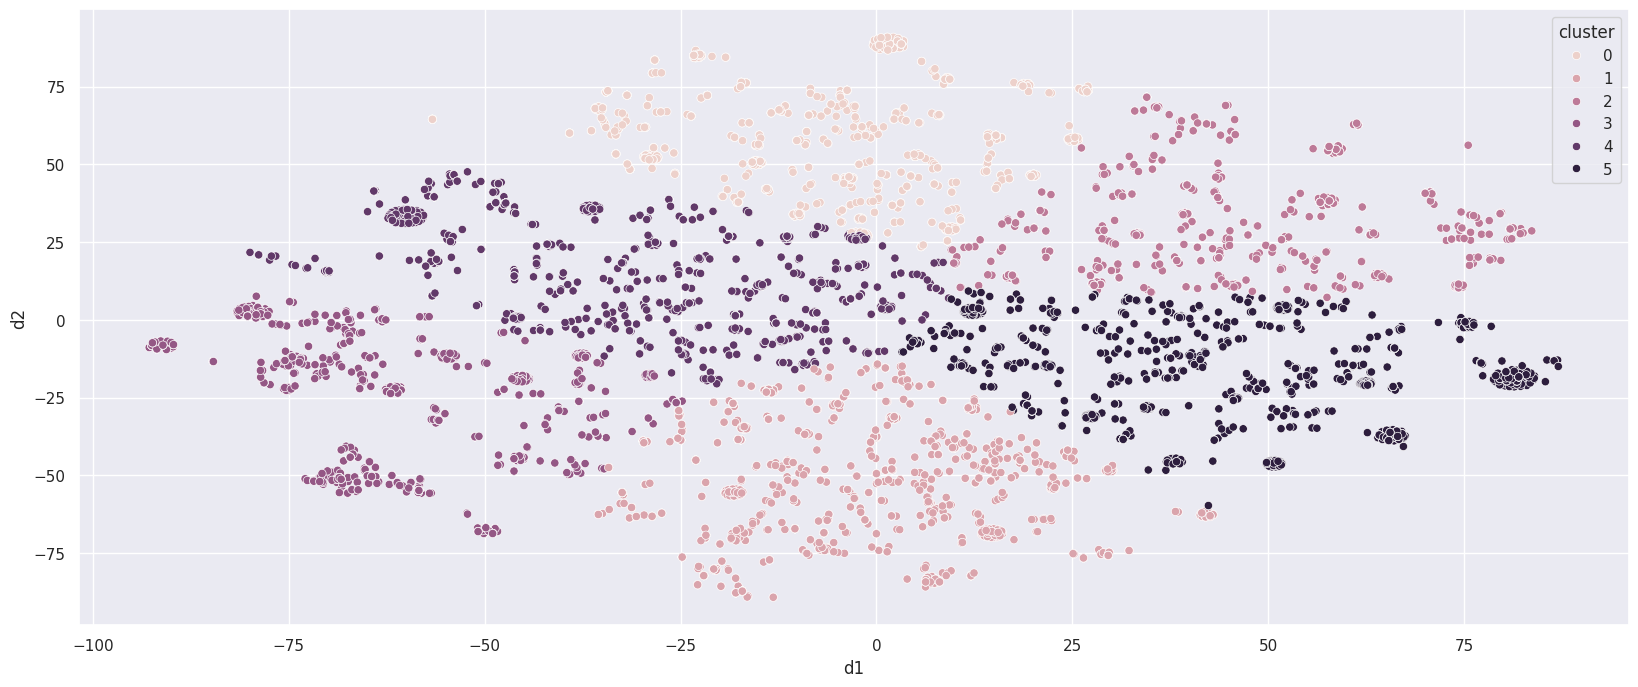

In [34]:
km = KMeans(6)
km_model = km.fit(xDimRed)
myDf['cluster'] = km_model.predict(xDimRed)
sns.scatterplot(x = myDf['d1'], y = myDf['d2'], hue = myDf['cluster'])

Trying out other clustering algos like Agglomerative Clustering, affinity propagation clustering,BIRCH, Mini batch K-Means.

<Axes: xlabel='d1', ylabel='d2'>

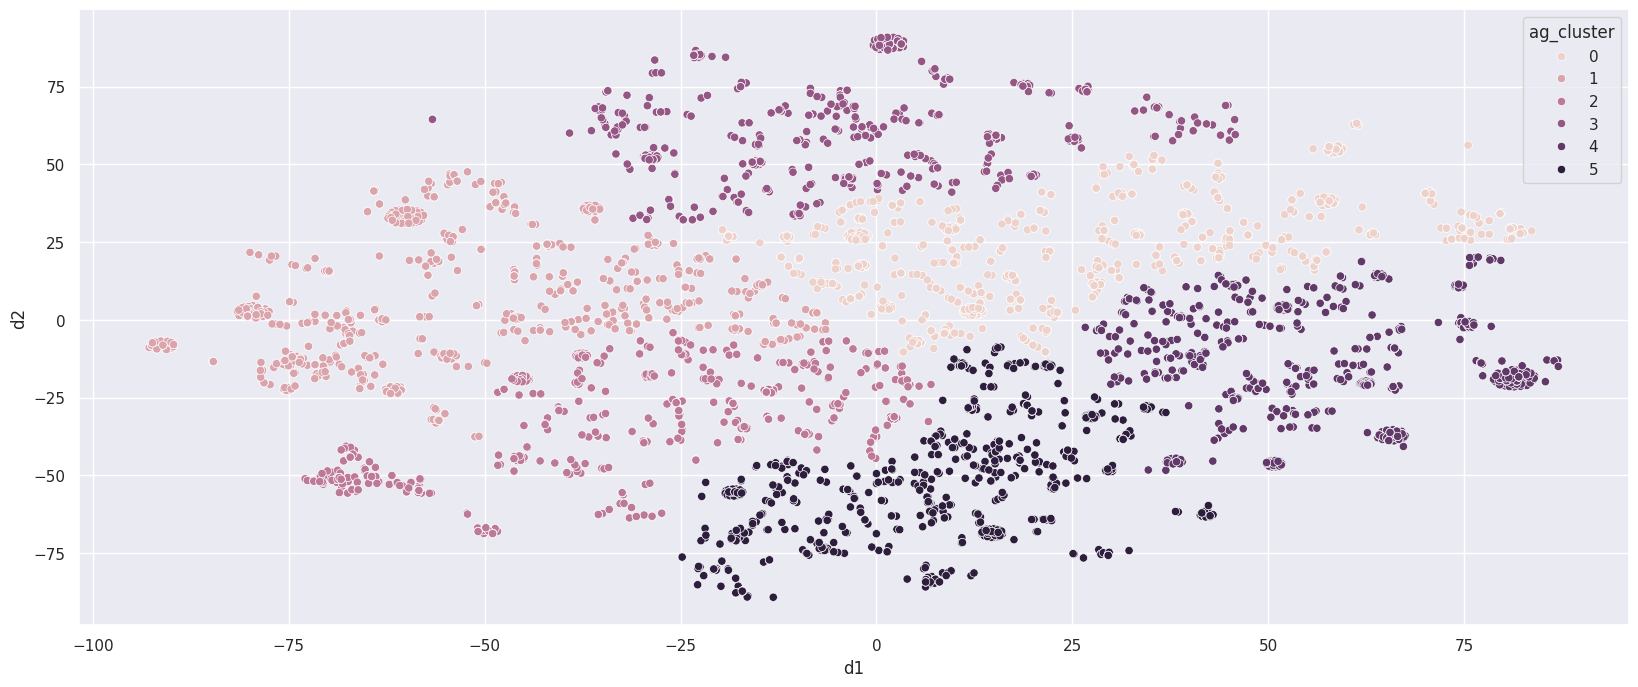

In [41]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=6)
ac_model = ac.fit(xDimRed)
myDf['ag_cluster'] = ac_model.fit_predict(xDimRed)
sns.scatterplot(x = myDf['d1'], y = myDf['d2'], hue = myDf['ag_cluster'])

<Axes: xlabel='d1', ylabel='d2'>

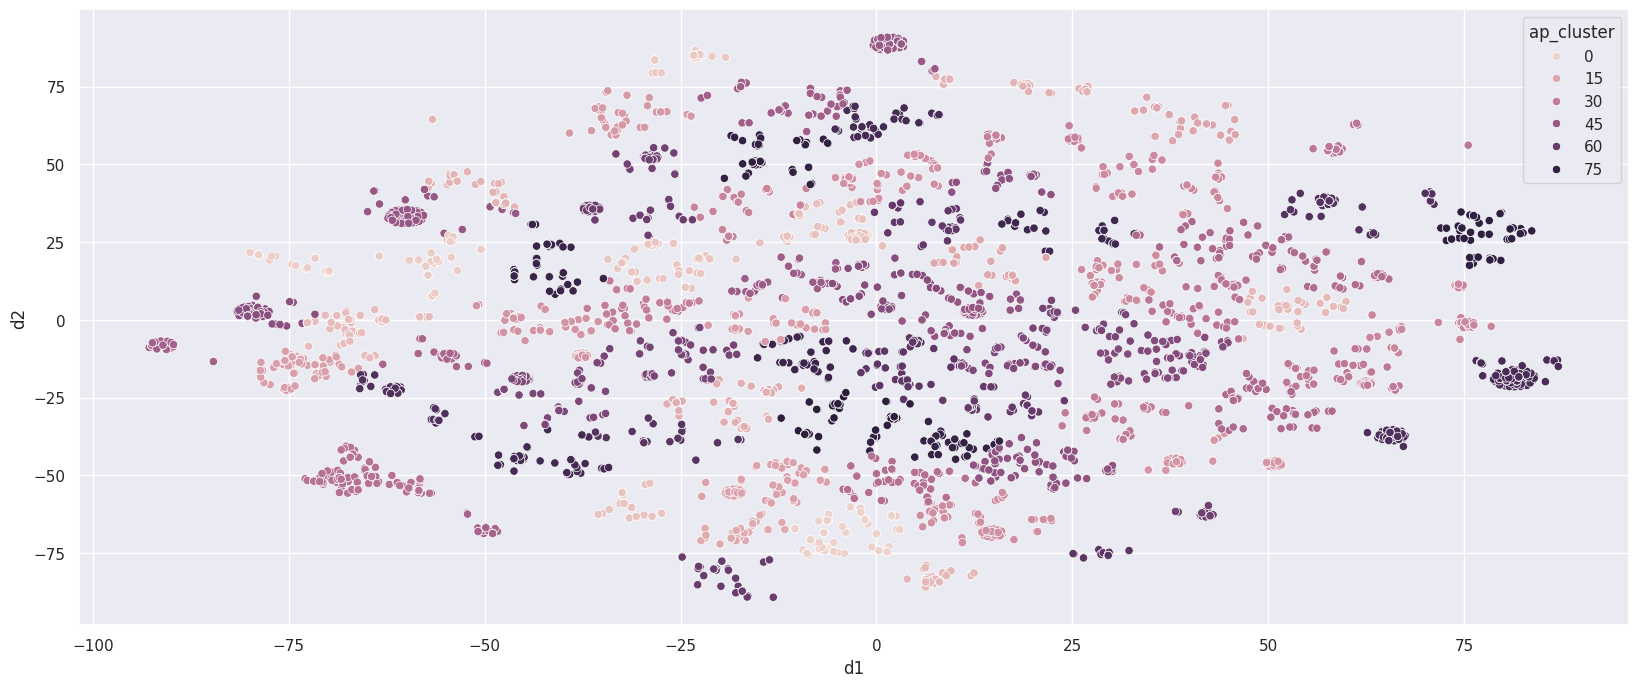

In [42]:
from sklearn.cluster import AffinityPropagation
ap = AffinityPropagation(damping=0.9)
ap_model = ap.fit(xDimRed)
myDf['ap_cluster'] = ap_model.predict(xDimRed)
sns.scatterplot(x = myDf['d1'], y = myDf['d2'], hue = myDf['ap_cluster'])

<Axes: xlabel='d1', ylabel='d2'>

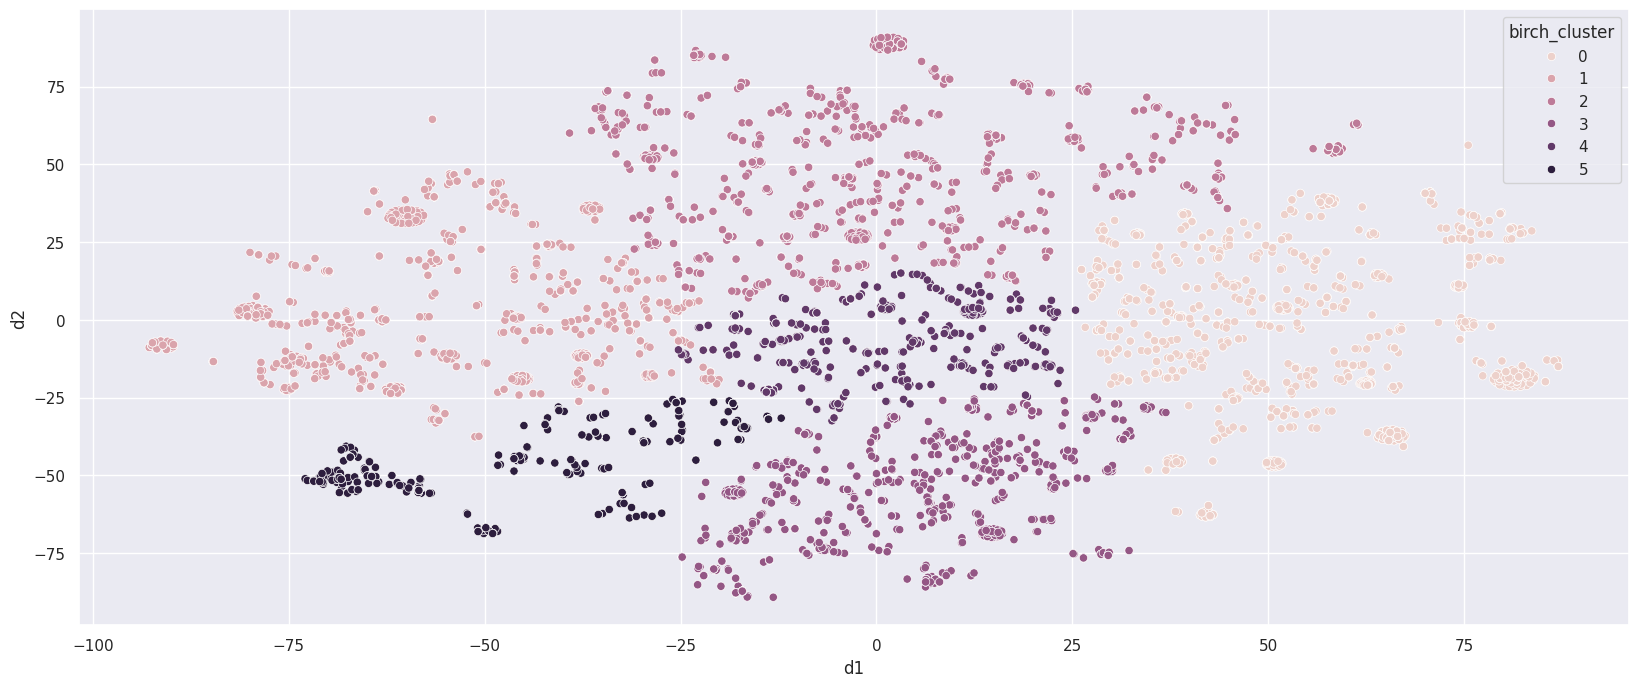

In [43]:
from sklearn.cluster import Birch
birch = Birch(n_clusters=6)
birch_model = birch.fit(xDimRed)
myDf['birch_cluster'] = birch_model.predict(xDimRed)
sns.scatterplot(x = myDf['d1'], y = myDf['d2'], hue = myDf['birch_cluster'])

<Axes: xlabel='d1', ylabel='d2'>

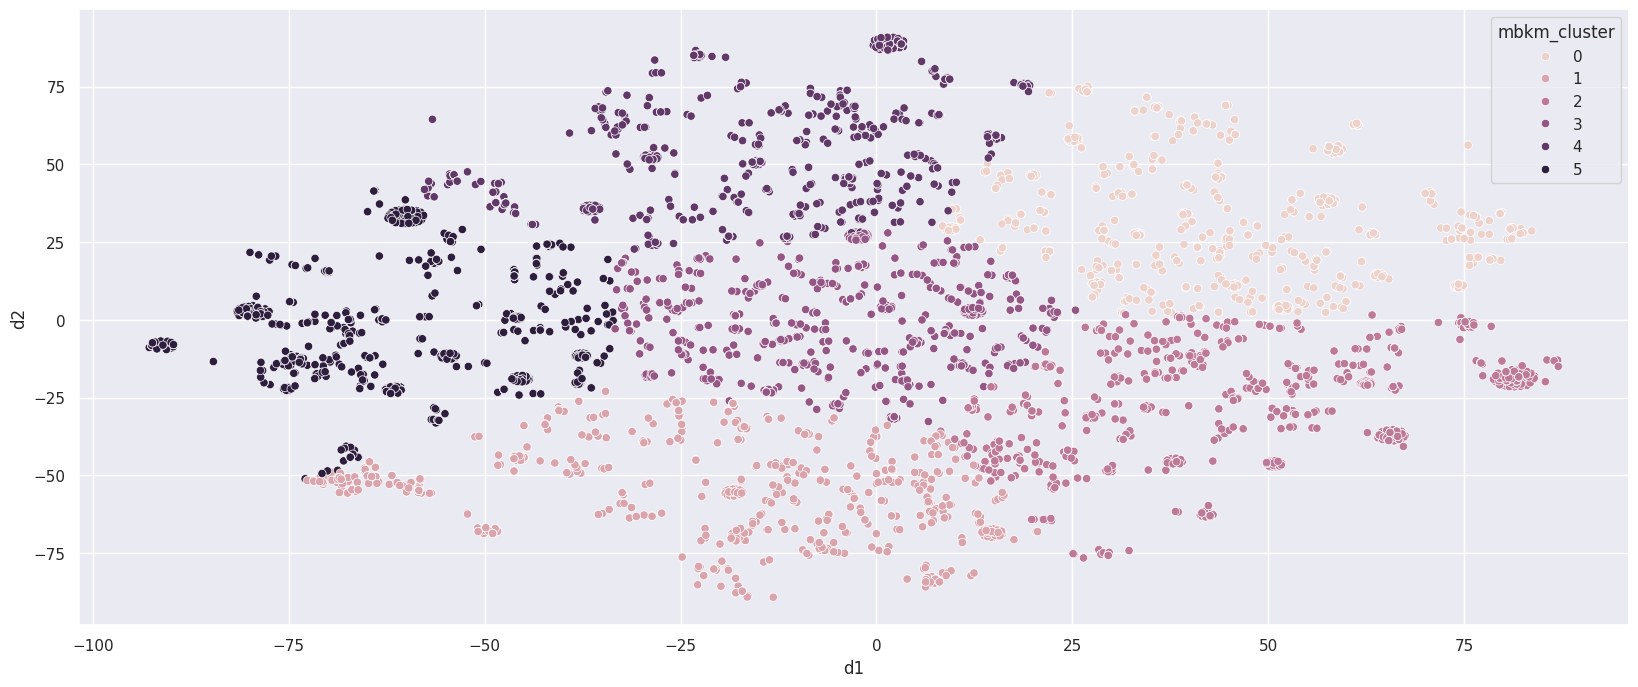

In [44]:
from sklearn.cluster import MiniBatchKMeans
mbkm = MiniBatchKMeans(n_clusters=6)
mbkm_model = mbkm.fit(xDimRed)
myDf['mbkm_cluster'] = mbkm_model.predict(xDimRed)
sns.scatterplot(x = myDf['d1'], y = myDf['d2'], hue = myDf['mbkm_cluster'])

In [ ]:
cDf = cDf.join(myDf['ag_cluster'])

In [70]:
cDf

,Unnamed: 0,artistName,trackName,msPlayed,datetime,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,time_signature,ag_cluster
0,0,Halsey,Gasoline,199593,2020-05-12 08:49:00,0.731,0.580,10,-7.328,0,0.0399,0.223000,0.000000,0.1290,0.319,120.001,2IO7yf562c1zLzpanal1DT,4,2
1,1,Dua Lipa,IDGAF,150004,2020-05-24 15:36:00,0.782,0.728,5,-5.930,1,0.0768,0.427000,0.000000,0.2500,0.876,97.975,4ZUpTMKPYFTfJqamWFU9Zv,4,3
2,2,Dua Lipa,IDGAF,213981,2020-05-28 09:21:00,0.782,0.728,5,-5.930,1,0.0768,0.427000,0.000000,0.2500,0.876,97.975,4ZUpTMKPYFTfJqamWFU9Zv,4,3
3,3,Jack & Jack,No One Compares To You,177858,2020-05-28 09:25:00,0.700,0.747,1,-6.044,1,0.0436,0.127000,0.000000,0.0941,0.629,111.941,4cZ3UsiKd1kUQIaq4BFIj2,4,0
4,4,Why Don't We,Big Plans,146083,2020-05-28 09:27:00,0.693,0.604,11,-5.279,1,0.0427,0.066800,0.000000,0.1140,0.651,75.014,448hSkxDU1sUQQauBWZVcC,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7755,7755,Jubël,Weekend Vibe,166909,2021-05-20 09:16:00,0.688,0.742,5,-6.363,1,0.0496,0.009120,0.000001,0.1860,0.740,110.026,5c0lWlmIyCq7hzBhpZasYL,4,0
7756,7756,SHAUN,Way Back Home (feat. Conor Maynard) - Sam Feld...,192452,2021-05-20 09:24:00,0.737,0.747,10,-4.818,1,0.0323,0.269000,0.000000,0.2190,0.447,105.943,1ZLrDPgR7mvuTco3rQK8Pk,4,0
7757,7757,OMI,Masterpiece,180875,2021-05-20 09:33:00,0.324,0.863,10,-3.716,0,0.1230,0.000109,0.000000,0.3110,0.394,177.985,3c9kVsKF68xMzlS0NikVn3,4,5
7758,7758,Jubël,Dancing In The Moonlight (feat. NEIMY) - Tiëst...,147146,2021-05-20 09:39:00,0.679,0.619,9,-4.983,1,0.0528,0.213000,0.000000,0.1050,0.497,124.944,3dgVBgrgHLzbhAYepa1V1V,4,1


Taking a look at some of the data across all clusters :

In [66]:
cluster_0 = cDf.loc[ myDf['ag_cluster'] == 0, ['artistName',	'trackName', 'danceability','energy','speechiness',	'acousticness'	,'instrumentalness'	,'liveness']]
cluster_0.sample(5)

,artistName,trackName,danceability,energy,speechiness,acousticness,instrumentalness,liveness
2959,Rak-Su,Rotate (Clockwise),0.832,0.746,0.0981,0.10500,0.0,0.3090
1062,Why Don't We,8 Letters - R3HAB Remix,0.638,0.708,0.0421,0.24000,0.0,0.3110
5897,Mondays,If I Was Your Girlfriend,0.737,0.622,0.0288,0.00588,0.0,0.0831
6537,Hailee Steinfeld,"Let Me Go (with Alesso, Florida Georgia Line &...",0.664,0.708,0.0474,0.03370,0.0,0.0841
7686,The Chainsmokers,Call You Mine,0.585,0.696,0.0307,0.20400,0.0,0.3440


In [62]:
cluster_1 = cDf.loc[ myDf['ag_cluster'] == 1, ['artistName',	'trackName', 'danceability','energy','speechiness',	'acousticness'	,'instrumentalness'	,'liveness']]
cluster_1.sample(5)

,artistName,trackName,danceability,energy,speechiness,acousticness,instrumentalness,liveness
3460,Bebe Rexha,Girl in the Mirror,0.330,0.273,0.0293,0.814,0.0,0.1130
4988,DEAMN,Without You,0.662,0.413,0.0299,0.213,0.0,0.1340
5867,The Chainsmokers,Closer,0.748,0.524,0.0338,0.414,0.0,0.1110
3595,Bebe Rexha,Girl in the Mirror,0.330,0.273,0.0293,0.814,0.0,0.1130
792,NEFFEX,Worst Of You,0.741,0.466,0.0357,0.558,0.0,0.0583


In [63]:
cluster_2 = cDf.loc[ myDf['ag_cluster'] == 2, ['artistName',	'trackName', 'danceability','energy','speechiness',	'acousticness'	,'instrumentalness'	,'liveness']]
cluster_2.sample(5)

,artistName,trackName,danceability,energy,speechiness,acousticness,instrumentalness,liveness
1346,Felix Jaehn,"Cool (feat. Marc E. Bassy, Gucci Mane)",0.620,0.747,0.1400,0.05910,0.0,0.0890
1290,Iggy Azalea,Lola,0.365,0.787,0.0413,0.48100,0.0,0.0739
3748,Halsey,Colors,0.337,0.835,0.0570,0.00174,0.0,0.0945
5148,Fifth Harmony,Don't Say You Love Me,0.768,0.393,0.0550,0.28200,0.0,0.0873
364,Vicetone,Home,0.653,0.718,0.2130,0.00413,0.0,0.0537


In [64]:
cluster_3 = cDf.loc[ myDf['ag_cluster'] == 3, ['artistName',	'trackName', 'danceability','energy','speechiness',	'acousticness'	,'instrumentalness'	,'liveness']]
cluster_3.sample(5)

,artistName,trackName,danceability,energy,speechiness,acousticness,instrumentalness,liveness
6498,Zedd,Funny,0.893,0.537,0.0779,0.01130,0.002710,0.0707
4575,Felix Jaehn,Feel Good,0.818,0.705,0.1770,0.00836,0.002330,0.6130
5263,Jake Miller,Rumors,0.673,0.706,0.1150,0.06030,0.000003,0.4260
4323,Black Eyed Peas,GIRL LIKE ME,0.965,0.485,0.1910,0.02060,0.023700,0.0655
2476,BTS,Dynamite,0.754,0.804,0.0853,0.00332,0.000000,0.0329


In [65]:
cluster_4 = cDf.loc[ myDf['ag_cluster'] == 4, ['artistName',	'trackName', 'danceability','energy','speechiness',	'acousticness'	,'instrumentalness'	,'liveness']]
cluster_4.sample(5)

,artistName,trackName,danceability,energy,speechiness,acousticness,instrumentalness,liveness
6834,R3HAB,Candyman,0.572,0.864,0.0477,0.0215,0.000000,0.375
5333,Nick Jonas,Jealous - Remix,0.684,0.710,0.0768,0.0132,0.000000,0.444
290,Vishal Dadlani,Lalla Lalla Lori,0.638,0.895,0.0453,0.0947,0.000000,0.104
1604,Picture This,If You Wanna Be Loved - John Gibbons Remix,0.680,0.903,0.0425,0.2440,0.000002,0.274
4089,Zedd,The Middle,0.643,0.849,0.0526,0.0371,0.000000,0.058


In [61]:
cluster_5 = cDf.loc[ myDf['ag_cluster'] == 5,['artistName',	'trackName', 'danceability','energy','speechiness',	'acousticness'	,'instrumentalness'	,'liveness']]
cluster_5.sample(5)

,artistName,trackName,danceability,energy,speechiness,acousticness,instrumentalness,liveness
1239,NOTD,I Wanna Know (feat. Bea Miller),0.661,0.725,0.0563,0.02530,0.00000,0.1230
2283,Jennifer Lopez,Dinero,0.709,0.782,0.0672,0.00774,0.00000,0.1070
6194,Blasterjaxx,Bodytalk (STFU),0.773,0.808,0.0579,0.00307,0.06240,0.2200
7532,G-Eazy,Good Life (with G-Eazy & Kehlani),0.572,0.778,0.2330,0.00638,0.00000,0.0563
4461,Kesha,Crazy Kids,0.742,0.706,0.0433,0.01410,0.00568,0.1330


In [73]:
overview = cDf.groupby('ag_cluster')[['danceability','energy','speechiness',	'acousticness','instrumentalness'	,'liveness']].mean()

In [74]:
overview

,danceability,energy,speechiness,acousticness,instrumentalness,liveness
ag_cluster,,,,,,
0,0.710760,0.751285,0.079508,0.103172,0.005379,0.244721
1,0.653078,0.504817,0.050948,0.417898,0.004992,0.136149
2,0.566489,0.691299,0.061809,0.202829,0.109637,0.126317
3,0.755885,0.687508,0.190727,0.189863,0.004920,0.182255
4,0.643271,0.828042,0.062242,0.050132,0.001923,0.220171
5,0.582429,0.780906,0.087974,0.068223,0.003085,0.142085
